# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# 1. import libraries for data manipulation
import numpy as np
import pandas as pd

# 2. import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# 1. Read the data
df = pd.read_csv('foodhub_order.csv')
# 2. This returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape
# Answer: The dimensions of this df are 1898 rows and 9 columns

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# 1. Use info() to print a concise summary of the DataFrame
df.info()

# Answer: we have int values for all except the following columns
# restaurant_name, cuisine_type, day_of_the_week and rating which are objects (strings)
# cost_of_the_order is a float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# 1Write your code here
df.isnull() # 1. Will identify null values
# Answer: Seems like there are not missing values as the describe funtion utilized above shows 'non-null' for every single column. In addition, isnull() in in this cell shows
#'False' for the columns, supporting this result

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1893,False,False,False,False,False,False,False,False,False
1894,False,False,False,False,False,False,False,False,False
1895,False,False,False,False,False,False,False,False,False
1896,False,False,False,False,False,False,False,False,False


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()

# Answer:
#food_preparation_tim Minimum is 20 minutes
#food_preparation_tim Maximum is 35 minutes

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
# 1. Count how many times each unique value appears in the 'rating' column
# 2. Use .get('Not given', 0) to retrieve how many times 'Not given' was recorded
# Note. If 'Not given' doesn't appear in the column, it returns 0 by default
not_given = df['rating'].value_counts().get('Not given', 0)
print(f"{not_given} is the number of orders not rated")

# Answer: 736 is the number of orders not rated

736 is the number of orders not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

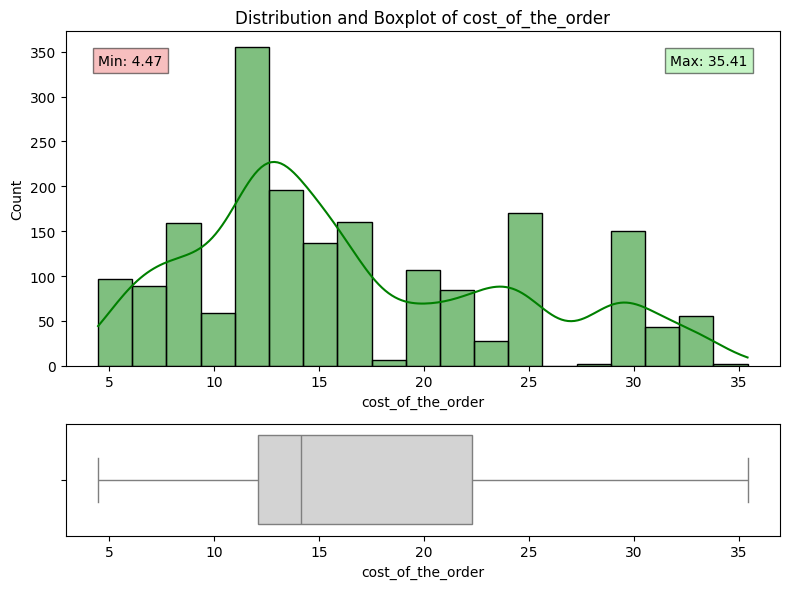

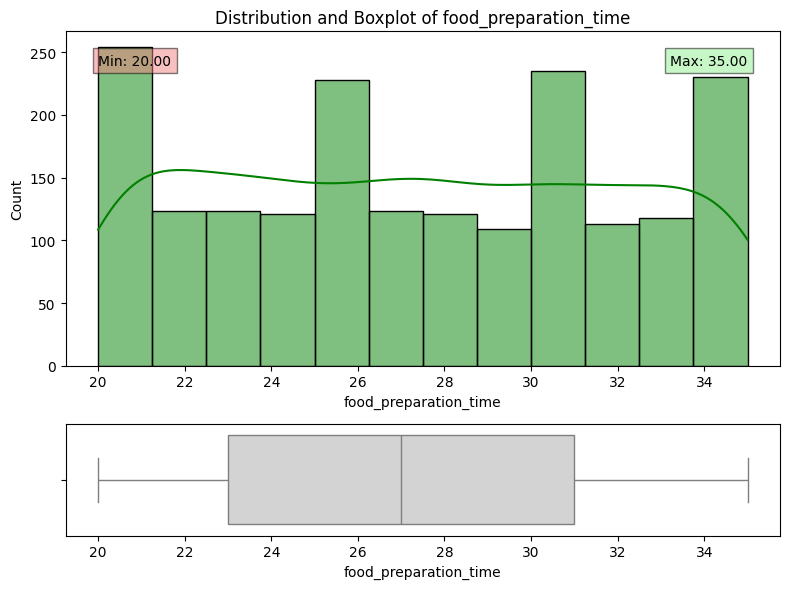

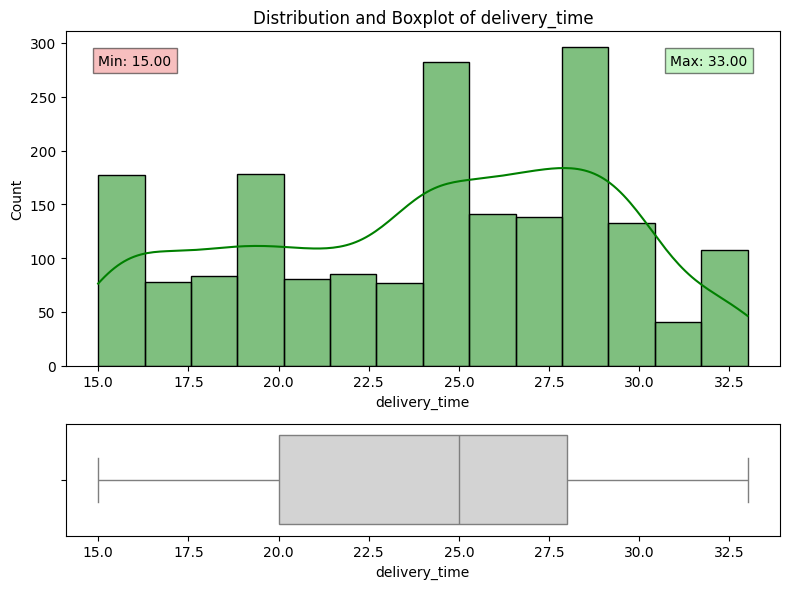

In [ ]:
# Setp 1. Exclude identifiers because there don{t describe any behavior, we could drop them from the df if needed
exclude_cols = ['order_id', 'customer_id']

# Step 2. Loop through each numeric column in the DataFrame
for col in df.select_dtypes(include=['number']).columns:
  if col not in exclude_cols: #in this way we tell the program to so not use the columns that are excluded

    # Step 3. Create a figure with two subplots (histogram on top, boxplot below)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6),
                             gridspec_kw={'height_ratios': [3, 1]})  # Wit this the histogram gets more height

    # Step 4. Plot histogram with KDE curve on the first subplot (top)
    sns.histplot(data=df, x=col, kde=True, ax=axes[0],
                 color='green', edgecolor='black')

    # Step 5. Get minimum and maximum values of the current column
    min_val = df[col].min()
    max_val = df[col].max()
    ymax = axes[0].get_ylim()[1]  # Get the max value in y for positioning labels

    # Step 6. Add label for minimum value as a text box
    axes[0].text(min_val, ymax * 0.9, f'Min: {min_val:.2f}',
                 bbox=dict(facecolor='lightcoral', alpha=0.5), ha='left')

    # Step 7. Add label for maximum value as a text box
    axes[0].text(max_val, ymax * 0.9, f'Max: {max_val:.2f}',
                 bbox=dict(facecolor='lightgreen', alpha=0.5), ha='right')

    # Step 8. Set title and y-axis label for the histogram
    axes[0].set_title(f'Distribution and Boxplot of {col}')
    axes[0].set_ylabel('Count')  # Because the histogram shows raw counts

    # Step 9. Plot boxplot of the same column on the second subplot (bottom)
    sns.boxplot(data=df, x=col, ax=axes[1], color='lightgray')

    # Step 10. Set x-axis label for the boxplot
    axes[1].set_xlabel(col)

    # Step 11. Automatically adjust subplot spacing for a clean layout
    plt.tight_layout()

    # Step 12. Show the complete plot
    plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# 1. Filter for weekend rows
weekend_df = df[df['day_of_the_week'] == 'Weekend']

# 2. Get top 5 cuisine types by number of orders
top_5_cuisines = weekend_df['restaurant_name'].value_counts().head(5)

# 3. Print results (top 5)
print("Top 5 restaurants on Weekends:\n")
for i, (cuisine, count) in enumerate(top_5_cuisines.items(), start=1):
    print(f"{i}. {cuisine} — {count} orders")

# Answer: The top 5 are these: Shake Shack, The Meatball Shop, Blue Ribbon, Sushi, Blue Ribbon Fried Chicken and RedFarm Hudson

Top 5 restaurants on Weekends:

1. Shake Shack — 145 orders
2. The Meatball Shop — 95 orders
3. Blue Ribbon Sushi — 85 orders
4. Blue Ribbon Fried Chicken — 74 orders
5. RedFarm Hudson — 44 orders


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
# Step 1. Filter for weekend rows in a new df
weekend_df = df[df['day_of_the_week'] == 'Weekend']

# Step 2. Get top cuisine type by number of orders
top_5_cuisines = weekend_df['cuisine_type'].value_counts().head(1)

# Step 3. Print results (top 5)
print("Top 5 Cuisines on Weekends:\n")
for i, (cuisine, count) in enumerate(top_5_cuisines.items(), start=1):
    print(f"{i}. {cuisine} — {count} orders")
# Answer: The most popular cuisine on the weekends is American

Top 5 Cuisines on Weekends:

1. American — 415 orders


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
cost_of_the_orders = df['cost_of_the_order']

# Step 1, set the onditional to be > $20 for all the orders under the
# column cost_of_the_orders
more_than_20 = (cost_of_the_orders > 20).sum()

# Step 2. Get the total
total_orders = len(cost_of_the_orders) # With len you get the records/rows

# Step 3. Take the percentage out of the 100%
percentage = (more_than_20 / total_orders) * 100

print(f"Out of all the orders, just the {percentage:.2f}% cost more than $20")

# Answer: 29.24%

Out of all the orders, just the 29.24% cost more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
# Step 1. Use the describe function
df.describe()
# Answer: After running the describe function I found the mean is 24.16 minutes

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# Step 1. Count the values and get the first 3
print(df['customer_id'].value_counts().head(3))

# Answer: The IDs are
# 1st: 52832
# 2nd: 47440
# 3rd: 83287

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


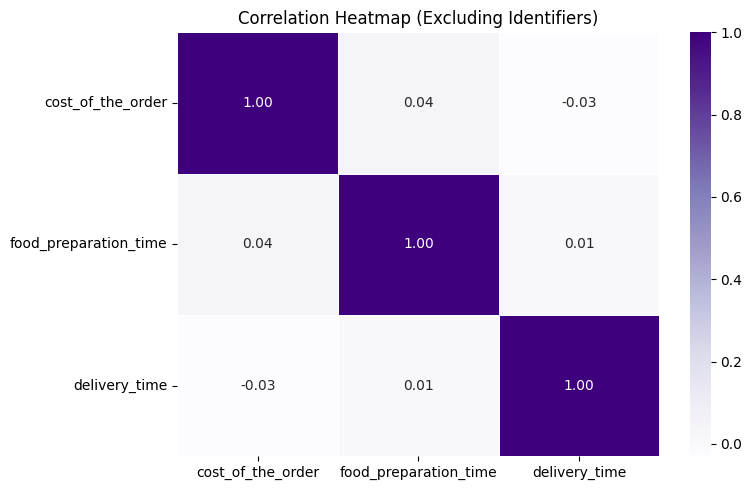

In [ ]:
# Write the code here
# Step 1: Exclude identifiers as we are not looking into any specific individual or item
exclude_cols = ['order_id', 'customer_id']

# Step 2: Select numeric columns excluding identifiers
numeric_cols = [col for col in df.select_dtypes(include='number').columns if col not in exclude_cols]
filtered_df = df[numeric_cols]

# Step 3: Compute correlation matrix
corr_matrix = filtered_df.corr()

# Step 4: Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)
#Note. Annot is used to have the values visible in the headmap and fmt to use as format a 2 decimal numerical expression on the values
plt.title('Correlation Heatmap (Excluding Identifiers)')
plt.tight_layout()
plt.show()

In [ ]:
#Answer:
# Observation about the heatmap: the correlation values are all very close to zero, indicating no strong linear relationships among the numeric variables
# Note. I excluded identifiers, for a more organized format, check the table below
# Step 1. Get correlations for the df with relevant data
filtered_df.corr()

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


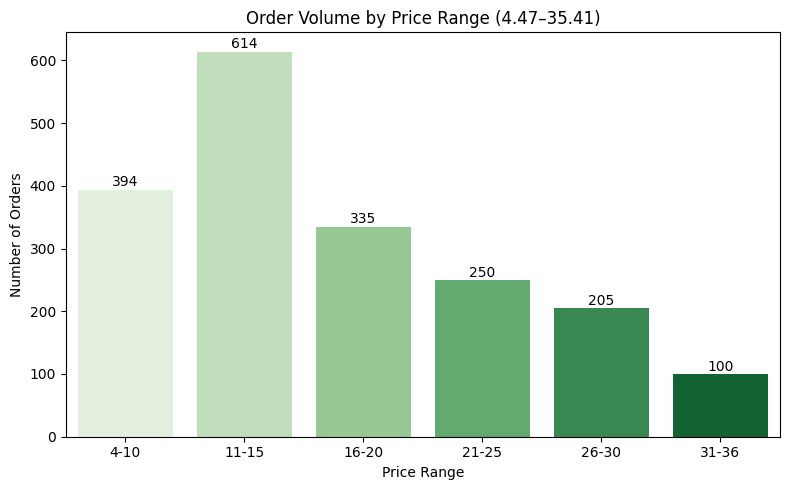

In [ ]:
# I want to double check the volume of orders per cost. This will help me to clarify any type of tendency

# Step 1: Define the ranges for the bars based on the minimum and max cost (4.47 35.41)
df['price_range'] = pd.cut(df['cost_of_the_order'],
                           bins=[4, 10, 15, 20, 25, 30, 36],
                           labels=['4-10', '11-15', '16-20', '21-25', '26-30', '31-36'])

# Step 2: Count orders per price range
order_count = df['price_range'].value_counts().sort_index().reset_index()
order_count.columns = ['price_range', 'order_count']

# Step 3: Plot with data labels
plt.figure(figsize=(8, 5))
bar = sns.barplot(data=order_count, x='price_range', y='order_count', palette='Greens', hue='price_range')

for i, row in order_count.iterrows():
    bar.text(i, row['order_count'] + 5, row['order_count'], color='black', ha='center')

plt.title('Order Volume by Price Range (4.47–35.41)')
plt.xlabel('Price Range')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

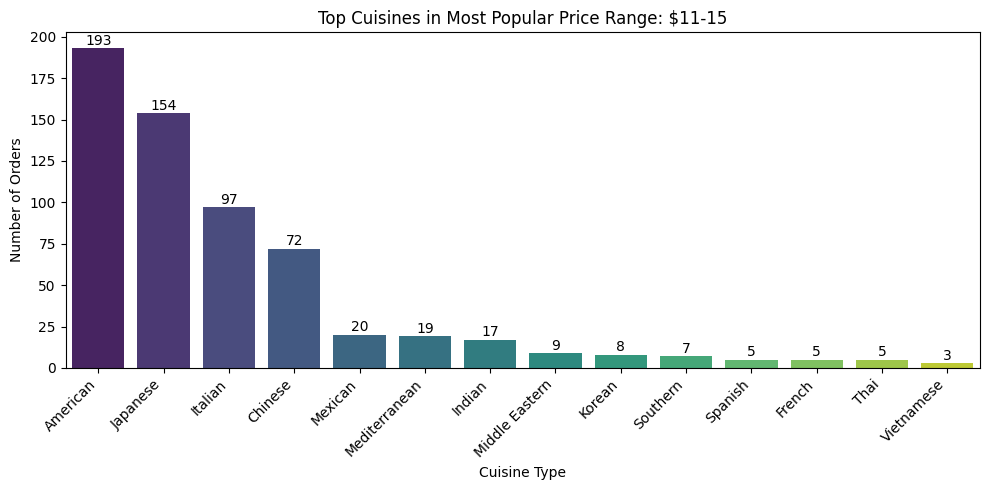

In [ ]:
# Now that I know the most common price range is 11-15, I want to understand the distribution of cuisine types in it
# Step 1: Filter dataset to only include orders in that price range
most_common_range = order_count.loc[order_count['order_count'].idxmax(), 'price_range']
df_top_range = df[df['price_range'] == most_common_range]

# Step 2: Count cuisine types in that range
top_cuisines_in_range = df_top_range['cuisine_type'].value_counts().reset_index()
top_cuisines_in_range.columns = ['cuisine_type', 'order_count']

# Step 3: Plot top cuisins and add data labels
plt.figure(figsize=(10, 5))
bar = sns.barplot(data=top_cuisines_in_range, x='cuisine_type', y='order_count', palette='viridis', hue= 'cuisine_type')
for i, row in top_cuisines_in_range.iterrows():
    bar.text(i, row['order_count'] + 2, row['order_count'], ha='center')
plt.title(f'Top Cuisines in Most Popular Price Range: ${most_common_range}')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right') # ha is just a paramenter to fix the location of the bars, nothing major or relevant to the code itself. It helps to mimic the series on bar charts in excel (groups)
plt.tight_layout()
plt.show()

The bar chart above confirms American food still the most popular, but it also reveals that within the range discovered the second cuisine type most ordered is the Japanese food followed by Italian

Another important aspect to analyze is the earnings (revenue), as this provides a clearer picture of which cuisine types are more profitable and therefore more strategic for investment, such as targeted ads or promotions
While American and Japanese cuisines seems to be the most frequently ordered, it is a good idea to investigate whether other cuisine types may actually be generating higher daily revenue for the app. At the end, popularity in terms of volume does not always translate to profitability

NOTE. As the dataset does not provide revenue by individual days comparing total earnings without adjusting for this difference would lead to unfair conclusions, 5 vs 2 days is not fair
So, to ensure a fair comparison, this analysis calculates the average daily revenue per cuisine by dividing the total revenue in each group by the number of days it represents

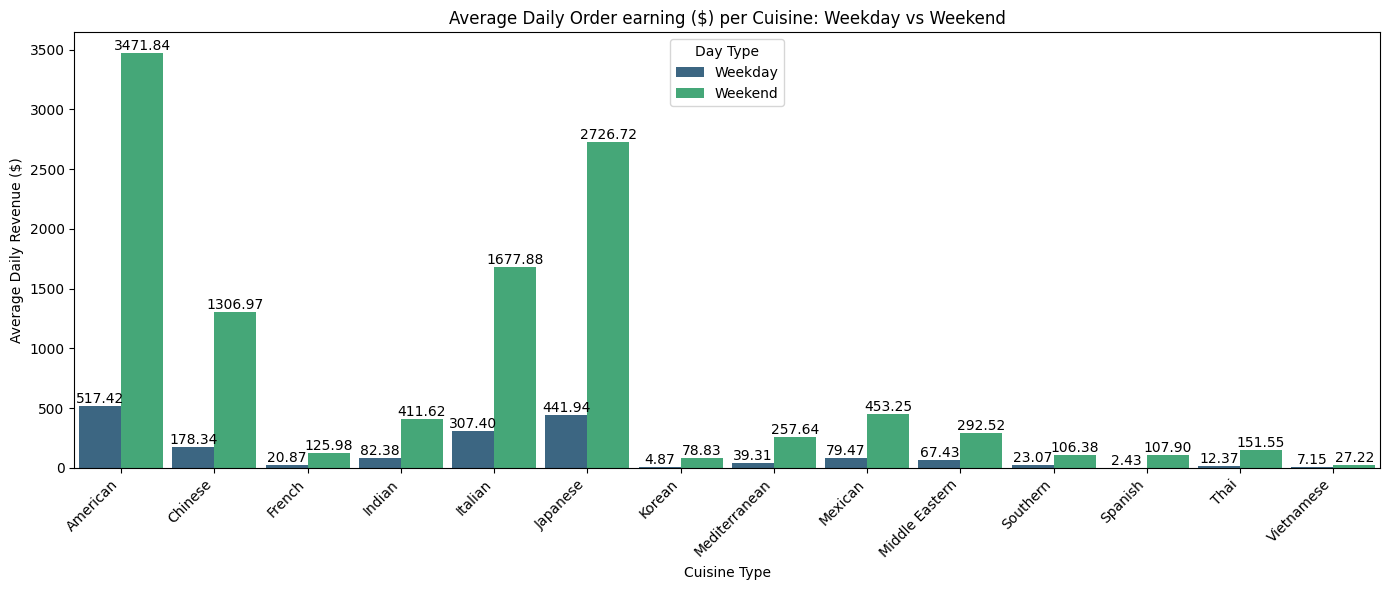

In [ ]:
# Step 1: Define the number of days in each category
days_per_type = {'Weekday': 5, 'Weekend': 2}

# Step 2: Group by cuisine and day type to calculate total revenue
total_revenue = df.groupby(['cuisine_type', 'day_of_the_week'])['cost_of_the_order'].sum().reset_index()

# Step 3: Add new column with average daily revenue (total divided by number of days)
total_revenue['avg_daily_revenue'] = total_revenue.apply(
    lambda row: row['cost_of_the_order'] / days_per_type[row['day_of_the_week']],
    axis=1)

# Step 4: Plot the average *daily* revenue per cuisine
plt.figure(figsize=(14, 6))
bar = sns.barplot(
    data=total_revenue,
    x='cuisine_type',
    y='avg_daily_revenue',
    hue='day_of_the_week', # hue is used to break the graph down based on the variable I choose, this time is wether data was generated on a weekday or weekend
    palette='viridis',
    width=0.9)# The closer to 0, the thinner the bars

# Step 5: Add data labels to each bar
for container in bar.containers:
    bar.bar_label(container, fmt='%.2f', label_type='edge')

# Step 6: Final chart formatting
plt.title('Average Daily Order earning ($) per Cuisine: Weekday vs Weekend')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Daily Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Day Type', loc='upper center')
plt.tight_layout()
plt.show()


After that chart, it is easy to confirm the ranking saw in the "Top Cuisines in Most Popular Price Range" should be kept

I find interesting to know which restaurants are convenient to partner with to create attractive offers for customers based on cuisine type. For this, I would say customer satisfaction is key, but I've previously found 736 'Not given' values in the rating column. Because of this, I am getting the distribution of 'Not given' across restaurants in the top 3 cusisine styles: Amerian, Japanese and Italian

In [ ]:
# As I want to get data per restaurants, I will first get how many of them are included in my dataset
# Step 1: Count of unique restaurant names
restaurant_count = df['restaurant_name'].nunique()
print(f"There are {restaurant_count} restaurants in the dataset")

There are 178 restaurants in the dataset


In [ ]:
# As an additional filter, I am taking the top 3 restaurants for each of the popular cuisine styles. 178 restaurants can be too much for a simply x axis
# Step 1: Define the top 3 cuisines with the most 'Not given' ratings
top_cuisines = ['American', 'Japanese', 'Italian']

# Step 2: Filter dataset for those cuisines only
filtered_df = df[df['cuisine_type'].isin(top_cuisines)]

# Step 3: Group by cuisine and restaurant, after that count order volume
restaurant_orders = (
    filtered_df.groupby(['cuisine_type', 'restaurant_name'])
    .size()
    .reset_index(name='order_count')) # Will be used to do the counts

# Step 4: Get top 3 restaurants per cuisine
top_3_restaurants = (
    restaurant_orders.sort_values(['cuisine_type', 'order_count'], ascending=[True, False])
    .groupby('cuisine_type')
    .head(3)
    .reset_index(drop=True))
print(top_3_restaurants)

  cuisine_type                restaurant_name  order_count
0     American                    Shake Shack          219
1     American      Blue Ribbon Fried Chicken           96
2     American    Five Guys Burgers and Fries           29
3      Italian              The Meatball Shop          112
4      Italian                           Parm           68
5      Italian                       Rubirosa           37
6     Japanese              Blue Ribbon Sushi          119
7     Japanese                            TAO           49
8     Japanese  Blue Ribbon Sushi Bar & Grill           44


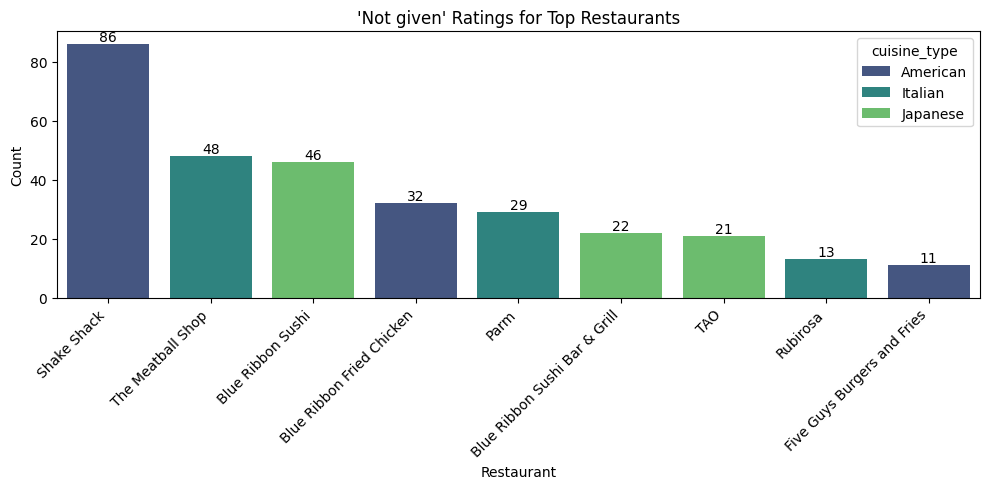

In [ ]:
# Step 6.Get top restaurant names from previous table
top_rest_names = top_3_restaurants['restaurant_name'].unique()

# Step 7. Filter only 'Not given' ratings for those restaurants
not_given = df[(df['restaurant_name'].isin(top_rest_names)) & (df['rating'] == 'Not given')]

# Step 8. Count and merge cuisine info
count = not_given['restaurant_name'].value_counts().reset_index()
count.columns = ['restaurant_name', 'not_given_count']
count = count.merge(top_3_restaurants[['restaurant_name', 'cuisine_type']], on='restaurant_name')

# Step 9. Plot and add the labels
plt.figure(figsize=(10, 5))
bar = sns.barplot(data=count, x='restaurant_name', y='not_given_count', hue='cuisine_type', palette='viridis')
for i, row in count.iterrows():
    bar.text(i, row['not_given_count'] + 1, row['not_given_count'], ha='center')

plt.title("'Not given' Ratings for Top Restaurants")
plt.ylabel("Count")
plt.xlabel("Restaurant")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# The results are in the chart below

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Step 1: Filter out rows where rating is 'Not given' and convert to float
rating_df = df[df['rating'] != 'Not given'].copy()
rating_df['rating'] = rating_df['rating'].astype(float)

# Step 2: Group byrestaurant and calculate count and average
cavg_df = rating_df.groupby('restaurant_name').agg (rating_count=('rating', 'count'),average_rating=('rating', 'mean')).reset_index() # agg is for the grouping

# Step 3: Filter restaurants with more than 50 ratings and average rating higher than 4
promotions = cavg_df[(cavg_df['rating_count'] > 50) & (cavg_df['average_rating'] > 4)]

# Display
promotions

,restaurant_name,rating_count,average_rating
16,Blue Ribbon Fried Chicken,64,4.328125
17,Blue Ribbon Sushi,73,4.219178
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Calculate company revenue based on order cost
df['company_revenue'] = df['cost_of_the_order'].apply(
    lambda x: x * 0.25 if x > 20 else x * 0.15 if x > 5 else 0)
# NOTE. the apply function helps to reduce lines of code and work with conditional calculations as in this case

# Calculate totals
revenue_25 = df[df['cost_of_the_order'] > 20]['company_revenue'].sum()
revenue_15 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['company_revenue'].sum()
total_revenue = df['company_revenue'].sum()

# Results
print(f"Revenue from 25% commission orders: ${revenue_25:.2f}")
print(f"Revenue from 15% commission orders: ${revenue_15:.2f}")
print(f"Net revenue generated by the company: ${total_revenue:.2f}")

Revenue from 25% commission orders: $3688.73
Revenue from 15% commission orders: $2477.58
Net revenue generated by the company: $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Step 1: Create a new column for total time (prep + delivery)
df['total_time'] = df['delivery_time'] + df['food_preparation_time']

# Step 2: Count how many orders took more than 60 minutes
over_60 = df[df['total_time'] > 60].shape[0] # O= rows and 1= number of columns, I am using 0 because each row represents a record

# Step 3: Calculate total number of orders
total_orders = df.shape[0]

# Step 4: Calculate the percentage
percentage_over_60 = (over_60 / total_orders) * 100

# Step 5: Print the result
print(f"The {percentage_over_60:.2f}% takes more than 60 minutes to get delivered")

The 10.54% takes more than 60 minutes to get delivered


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
# Step 1: Calculate mean delivery time for Weekend
weekend_mean = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Step 2: Calculate mean delivery time for Weekday
weekday_mean = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Step 3: Print the results
print(f"Mean delivery time on Weekends: {weekend_mean:.2f} minutes and for weekdays it is: {weekday_mean:.2f} minutes ")

Mean delivery time on Weekends: 22.47 minutes and for weekdays it is: 28.34 minutes 


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

##Conclusions:
* The dataset includes 1898 food delivery orders and contains no missing values, making it easy to analyze. There are no extreme outliers, which supports greater confidence in the results and requires minimal preprocessing


* American food is the most popular on weekends, followed by Japanese and Italian. Restaurants like Shake Shack and The Meatball Shop are ordered from a lot, which shows people really like them. Most orders cost between 11 and 15 dollars, which seems to be a price people are comfortable with

* There are tendencies in terms of favorite cuisines, it was identified that in New York the American, Japanese and Italian cuisines are the favorites. Additionally, there are restaurants leading each cuisine type, this is the top 3 for each
  * American - Shake Shack (219), Blue Ribbon Fried Chicken (96) and Five Guys Burgers and Fries (29)
  * Japanese- Blue Ribbon Sushi (119) - TAO (49) - Blue Ribbon Sushi Bar & Grill (44)
  * Italian - The Meatball Shop (112) - Parm (68) - Rubirosa (37)

NOTE. From the previous rankings it can be noted that there are sustantial differences between the first and second places for restaurant in each cuisine type. Also, There is just a difference of 7 orders between the most orderd italian restaurant and the best american restaurant. This means Italian food can becomo more popular with some support from the app

* Out of all the orders 736 do not have customer ratings, this makes it harder to know if people were happy with their orders.Something interesting is that popular restaurans as the Meatball Shop also missed evaluations which indicates it can be an area of improvment to look at


* Based on the chart 'Average Daily Order earning ($) per Cuisine: Weekday vs Weekend', it is evident that the ranking observed in the 'Top Cuisines in the Most Popular Price Range' remains consistent. There is no change when comparing daily earnings, so American cuisine retains the top position, followed by Japanese, Italian, and Chinese as the most common and profitable options. Additionally, it reveals the weekend revenue is consistently higher than weekday revenue across all cuisines

* About 29% of orders cost more than 20 dollars. These give the company a higher commission (25%), so they are very important for making money. Orders between 5 and 20 dollars give a smaller commission (15%), but still help the business earn

* The average delivery time is about 24 minutes. Most food takes between 23 and 31 minutes to prepare. This shows that restaurants are pretty consistent. However, around 10% of orders take over an hour in total, which could make customers unhappy

* Deliveries are a bit faster on weekdays than on weekends which is useful to know when planning promotions or scheduling delivery workers

* There is no strong link between the numbers for cost, cooking time, and delivery time. This means no one factor controls how the order goes. If we look at things like customer type or time of day, we might find more useful patterns

* Restaurants like Blue Ribbon Fried Chicken and Shake Shack could be promoted more because they have over 50 ratings and an average score above 4.0. They would be great choices for special deals or to be shown more often in the app

### Recommendations:
* Time tracking: Begin collecting order date data to better understand user behavior across time, especially on weekends. This can help detect seasonality, weekly spikes, and slow periods, enabling better planning of marketing campaigns and operational capacity

* Price sweet spot promotions: Knowing that most users order meals priced between $11 and $15, the company can create campaigns like “Weekend Deals Under $15” to increase conversion and customer satisfaction, while keeping margins healthy

* Loyalty rewards for top customers: Identify and reward high-volume users (like the top 3 customers found in the analysis) through personalized loyalty programs or milestone discounts. Offering bonus rewards on weekends can help boost repeat purchases

* Rate and Earn system: Encourage users to leave more detailed feedback by offering a point-based reward system. Customers can earn more points for adding comments, photos, or item-specific ratings — especially during the weekend when volume is high. These points can be redeemed for discounts or free items

* Nearby filter for faster delivery: Let users filter available restaurants by proximity to reduce delivery wait times, specially the 10.54% for more than 1 hour. This is especially useful during busy periods like Friday and Saturday evenings when expectations for speed are higher

* Courier based matching: Improve delivery times by matching users with restaurants that are near both the user and an available courier. If the only available options are distant or premium, offer bonus points or a discount on their next order from the same cuisine type

* Weekend cuisine spotlight: Feature a different cuisine each weekend with a small discount, fast delivery, and double feedback points. This promotes discovery and increases engagement during high-traffic periods

* Hidden gem highlights: Show restaurants that don’t get many orders but have great ratings. This helps people discover new places and gives small restaurants a chance to grow. Small discounts or weekend highlights could help them get more attention

* Real time estimated time or arrival incentives: Display real delivery time estimates and offer micro rewards when those targets are met

Convert to HTML

In [ ]:
!pip install nbconvert

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---